In [143]:
import matplotlib.pyplot as plt
from load_dataset import Dataset
import plotting
dataset = Dataset('../data/dataset/')
%matplotlib inline

In [144]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
%autoreload 2

### Современный подход заключается в том, чтобы преобразовать нашу задачу к классической задаче регрессии. 


### 1. Возьмем некий временной ряд


In [146]:
ts = dataset["hour_376.csv"]

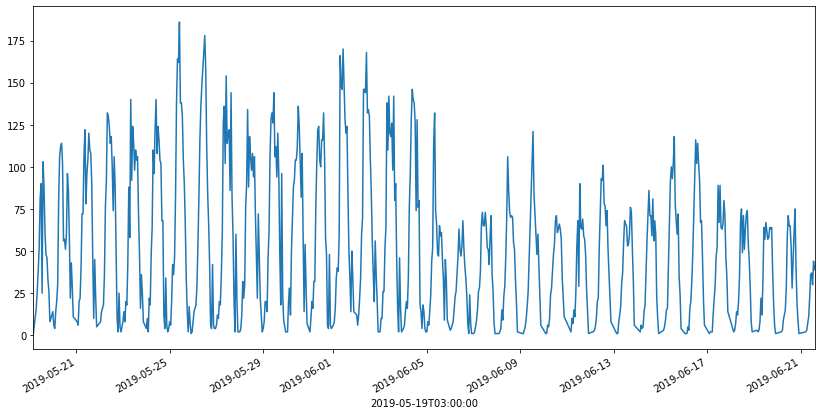

In [147]:
ts.plot(figsize=(14, 7))

### 2. Получим матрицу лагов

In [148]:
from model import TimeSeriesPredictor

In [136]:
predictor = TimeSeriesPredictor(num_lags=48, granularity='hour')

In [149]:
lag_matrix = predictor.transform(ts)

In [151]:
lag_matrix


,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_41,lag_42,lag_43,lag_44,lag_45,lag_46,lag_47,lag_48,season_lag,y
2019-05-19T03:00:00,,,,,,,,,,,,,,,,,,,,,
2019-05-21 09:00:00,106.0,72.0,72.0,40.0,22.0,20.0,6.0,8.0,11.0,29.0,...,81.0,52.0,38.0,26.0,16.0,11.0,6.0,1.0,1.0,122.0
2019-05-21 10:00:00,122.0,106.0,72.0,72.0,40.0,22.0,20.0,6.0,8.0,11.0,...,90.0,81.0,52.0,38.0,26.0,16.0,11.0,6.0,6.0,78.0
2019-05-21 11:00:00,78.0,122.0,106.0,72.0,72.0,40.0,22.0,20.0,6.0,8.0,...,25.0,90.0,81.0,52.0,38.0,26.0,16.0,11.0,11.0,96.0
2019-05-21 12:00:00,96.0,78.0,122.0,106.0,72.0,72.0,40.0,22.0,20.0,6.0,...,103.0,25.0,90.0,81.0,52.0,38.0,26.0,16.0,16.0,104.0
2019-05-21 13:00:00,104.0,96.0,78.0,122.0,106.0,72.0,72.0,40.0,22.0,20.0,...,87.0,103.0,25.0,90.0,81.0,52.0,38.0,26.0,26.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-21 10:00:00,22.0,11.0,7.0,3.0,2.0,1.0,9.0,19.0,40.0,75.0,...,8.0,3.0,2.0,3.0,2.0,8.0,28.0,44.0,44.0,36.0
2019-06-21 11:00:00,36.0,22.0,11.0,7.0,3.0,2.0,1.0,9.0,19.0,40.0,...,22.0,8.0,3.0,2.0,3.0,2.0,8.0,28.0,28.0,37.0
2019-06-21 12:00:00,37.0,36.0,22.0,11.0,7.0,3.0,2.0,1.0,9.0,19.0,...,12.0,22.0,8.0,3.0,2.0,3.0,2.0,8.0,8.0,30.0


In [152]:
len(ts)

717

In [153]:
len(lag_matrix)

669

In [154]:
717 - 669

48

### 3. Обогатим матрицу лагов дополнительными признаками.

In [155]:
matrix = predictor.enrich(lag_matrix)

In [156]:
matrix

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,...,lag_48,season_lag,y,weekday,monthday,is_weekend,month,hour,mean,std
2019-05-19T03:00:00,,,,,,,,,,,,,,,,,,,,,
2019-05-21 09:00:00,106.0,72.0,72.0,40.0,22.0,20.0,6.0,8.0,11.0,29.0,...,1.0,1.0,122.0,1,21,0,5,9,47.395833,34.584303
2019-05-21 10:00:00,122.0,106.0,72.0,72.0,40.0,22.0,20.0,6.0,8.0,11.0,...,6.0,6.0,78.0,1,21,0,5,10,49.916667,35.527534
2019-05-21 11:00:00,78.0,122.0,106.0,72.0,72.0,40.0,22.0,20.0,6.0,8.0,...,11.0,11.0,96.0,1,21,0,5,11,51.416667,35.151849
2019-05-21 12:00:00,96.0,78.0,122.0,106.0,72.0,72.0,40.0,22.0,20.0,6.0,...,16.0,16.0,104.0,1,21,0,5,12,53.187500,35.213426
2019-05-21 13:00:00,104.0,96.0,78.0,122.0,106.0,72.0,72.0,40.0,22.0,20.0,...,26.0,26.0,120.0,1,21,0,5,13,55.020833,35.525531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-21 10:00:00,22.0,11.0,7.0,3.0,2.0,1.0,9.0,19.0,40.0,75.0,...,44.0,44.0,36.0,4,21,0,6,10,30.958333,25.442433
2019-06-21 11:00:00,36.0,22.0,11.0,7.0,3.0,2.0,1.0,9.0,19.0,40.0,...,28.0,28.0,37.0,4,21,0,6,11,30.791667,25.381312
2019-06-21 12:00:00,37.0,36.0,22.0,11.0,7.0,3.0,2.0,1.0,9.0,19.0,...,8.0,8.0,30.0,4,21,0,6,12,30.979167,25.393490


In [157]:
predictor.fit(ts)

In [158]:
value = predictor.predict_next(ts)

In [160]:
value

2019-06-21 15:00:00    59.992305
dtype: float64

In [101]:
import pandas as pd
predictions = pd.Series()
for i in range(72):
    value = predictor.predict_next(ts)
    predictions = predictions.append(value)
    ts = ts.append(value)

In [161]:
plotting.plot_multiple_ts(ts, predictions)

#### Практическая часть.
##### Вам необходимо будет написать класс TimeSeriesPredictor, который должен имплементировать основную логику трансформации временного ряда в классическую матрицу-обьекты признаки и обучить на ней любую уже известную вам регрессионную модель (линейная регрессия, градиентый бустинг, случайный лес и так далее). После чего выдать предсказание на N следующих точек.

In [41]:
class TimeSeriesPredictor:
    def __init__(self, n_lags):
        self.n_lags = n_lags
        self.model = None
        
    def transform(self, ts):
        """
        Данный метод должен получать на вход временной ряд типа pandas Series
        и возвращать для нее матрицу лагов типа pandas DataFrame.
        В индексе dataframe должны содержать datetime обьекты из индекса ts.
        """
        # <your code here>
        pass
    
    def enrich(self, matrix):
        """
        Данный метод должен добавлять дополнительные фичи в матрицу лагов.
        Например, достать datetime фичи из индекса: месяц, день, час и так далее.
        Если вы не хотите ничего добавлять в матрицу, метод должен возвращать
        матрицу лагов как есть.
        """
        # <your code here>
        pass
    
    def generate_next_row(self, ts):
        """
        Данный метод должен принимать на вход временной ряд и возвращать следующую
        строку в матрице лагов, чтобы можно было сделать предсказание следующей точки.
        Не забудьте обогатить полученную строку методом enrich!
        """
        # <your code here>
        pass
    
    def fit(self, ts):
        """
        Данн
        ый метод принимает на вход временной ряд и обучает на нем модель. Сначала он использует методы
        transform и enrich, чтобы получить матрицу обьекты признаки. Затем, используя любую модель регрессии
        (допустим из библиотеки sklearn), обучает ее и сохраняет результат в self.model.
        """
        # <your code here>
        pass
        
    def predict(self, ts, steps=1):
        """
        Данный метод используя обученную модель и метод generate_next_row предсказывает
        следующее значение ряда. По умолчанию параметр steps равен единице. Чтобы предсказать несколько
        значений вперед, метод должен предсказывать на предсказанном значении, т.е. добавить
        предсказанное значение к ts, вызывать метод generate_next_row и сделать predict и так далее.
        """
        pass